In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426497, 30)
After OverSampling, the shape of train_y: (426497,) 

After OverSampling, counts of label '1': 213261
After OverSampling, counts of label '0': 213236
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

426497/426497 [==============================] - 25s 58us/step - loss: 13.7318 - rec_loss: 22.4041 - kl_loss: 4.0128 - val_loss: 13.4750 - val_rec_loss: 23.8118 - val_kl_loss: 2.6197
Epoch 17/150
426497/426497 [==============================] - 25s 58us/step - loss: 13.1196 - rec_loss: 21.2843 - kl_loss: 3.9679 - val_loss: 13.4642 - val_rec_loss: 23.8558 - val_kl_loss: 2.5910
Epoch 18/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.8391 - rec_loss: 20.7589 - kl_loss: 3.9717 - val_loss: 13.3770 - val_rec_loss: 23.7271 - val_kl_loss: 2.5704
Epoch 19/150
426497/426497 [==============================] - 25s 58us/step - loss: 12.7296 - rec_loss: 20.5549 - kl_loss: 3.9779 - val_loss: 13.4209 - val_rec_loss: 23.8982 - val_kl_loss: 2.5148
Epoch 20/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.6397 - rec_loss: 20.3885 - kl_loss: 3.9812 - val_loss: 13.2890 - val_rec_loss: 23.4386 - val_kl_loss: 2.7196
Epoch 21/150
426497/426497 [=====

Epoch 58/150
426497/426497 [==============================] - 26s 61us/step - loss: 11.5519 - rec_loss: 18.2434 - kl_loss: 4.1068 - val_loss: 12.7234 - val_rec_loss: 22.3252 - val_kl_loss: 2.7544
Epoch 59/150
426497/426497 [==============================] - 26s 60us/step - loss: 11.5517 - rec_loss: 18.2402 - kl_loss: 4.1077 - val_loss: 12.9143 - val_rec_loss: 22.5683 - val_kl_loss: 2.8940
Epoch 60/150
426497/426497 [==============================] - 26s 60us/step - loss: 11.5172 - rec_loss: 18.1643 - kl_loss: 4.1143 - val_loss: 12.8254 - val_rec_loss: 22.4212 - val_kl_loss: 2.8637
Epoch 61/150
426497/426497 [==============================] - 26s 61us/step - loss: 11.5340 - rec_loss: 18.1937 - kl_loss: 4.1164 - val_loss: 12.7509 - val_rec_loss: 22.2388 - val_kl_loss: 2.8910
Epoch 62/150
426497/426497 [==============================] - 26s 60us/step - loss: 11.5082 - rec_loss: 18.1467 - kl_loss: 4.1112 - val_loss: 12.6737 - val_rec_loss: 22.1229 - val_kl_loss: 2.8582
Epoch 63/150
426497/

Epoch 100/150
426497/426497 [==============================] - 25s 58us/step - loss: 11.3844 - rec_loss: 17.8902 - kl_loss: 4.1180 - val_loss: 12.6788 - val_rec_loss: 22.2198 - val_kl_loss: 2.7614
Epoch 101/150
426497/426497 [==============================] - 25s 58us/step - loss: 11.3440 - rec_loss: 17.8063 - kl_loss: 4.1217 - val_loss: 12.7028 - val_rec_loss: 22.2369 - val_kl_loss: 2.7847
Epoch 102/150
426497/426497 [==============================] - 25s 58us/step - loss: 11.3696 - rec_loss: 17.8726 - kl_loss: 4.1173 - val_loss: 12.7244 - val_rec_loss: 22.2727 - val_kl_loss: 2.7979
Epoch 103/150
426497/426497 [==============================] - 25s 57us/step - loss: 11.3547 - rec_loss: 17.8360 - kl_loss: 4.1213 - val_loss: 12.8159 - val_rec_loss: 22.5335 - val_kl_loss: 2.7205
Epoch 104/150
426497/426497 [==============================] - 25s 58us/step - loss: 11.2854 - rec_loss: 17.7028 - kl_loss: 4.1247 - val_loss: 12.7757 - val_rec_loss: 22.3637 - val_kl_loss: 2.8155
Epoch 105/150
4

426497/426497 [==============================] - 25s 58us/step - loss: 11.3206 - rec_loss: 17.7613 - kl_loss: 4.1414 - val_loss: 12.7315 - val_rec_loss: 22.2543 - val_kl_loss: 2.8539
Epoch 142/150
426497/426497 [==============================] - 25s 58us/step - loss: 11.5172 - rec_loss: 18.1424 - kl_loss: 4.1424 - val_loss: 13.0164 - val_rec_loss: 22.9263 - val_kl_loss: 2.7048
Epoch 143/150
426497/426497 [==============================] - 25s 58us/step - loss: 11.4038 - rec_loss: 17.8979 - kl_loss: 4.1443 - val_loss: 12.7963 - val_rec_loss: 22.4231 - val_kl_loss: 2.7900
Epoch 144/150
426497/426497 [==============================] - 24s 57us/step - loss: 11.5270 - rec_loss: 18.1593 - kl_loss: 4.1381 - val_loss: 13.9280 - val_rec_loss: 24.6796 - val_kl_loss: 2.7705
Epoch 145/150
426497/426497 [==============================] - 25s 58us/step - loss: 12.7024 - rec_loss: 20.3475 - kl_loss: 4.1934 - val_loss: 13.4131 - val_rec_loss: 23.6089 - val_kl_loss: 2.7228
Epoch 146/150
426497/426497 [

426497/426497 [==============================] - 88s 205us/step - loss: 0.3252 - accuracy: 0.8635 - val_loss: 0.2767 - val_accuracy: 0.8884
Epoch 42/50
426497/426497 [==============================] - 88s 206us/step - loss: 0.3249 - accuracy: 0.8640 - val_loss: 0.2742 - val_accuracy: 0.8866
Epoch 43/50
426497/426497 [==============================] - 89s 208us/step - loss: 0.3250 - accuracy: 0.8639 - val_loss: 0.2730 - val_accuracy: 0.8881
Epoch 44/50
426497/426497 [==============================] - 90s 210us/step - loss: 0.3249 - accuracy: 0.8635 - val_loss: 0.2792 - val_accuracy: 0.8880
Epoch 45/50
426497/426497 [==============================] - 88s 207us/step - loss: 0.3249 - accuracy: 0.8640 - val_loss: 0.2788 - val_accuracy: 0.8866
Epoch 46/50
426497/426497 [==============================] - 89s 208us/step - loss: 0.3244 - accuracy: 0.8639 - val_loss: 0.2789 - val_accuracy: 0.8890
Epoch 47/50
426497/426497 [==============================] - 88s 207us/step - loss: 0.3247 - accurac

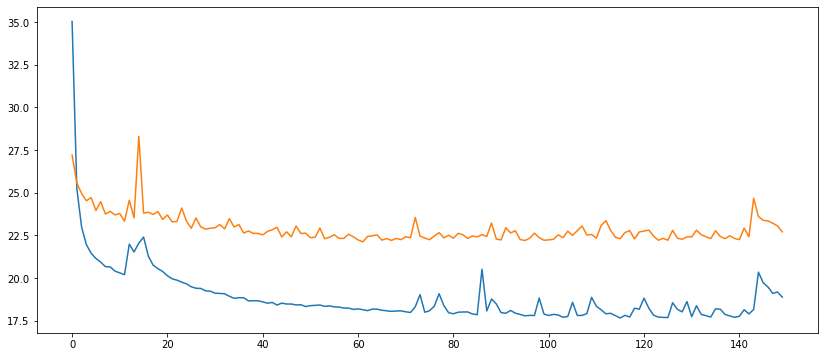

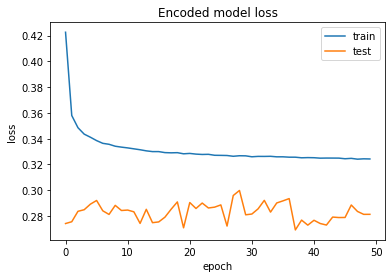

Overall accuracy of Convolutional Neural Network model: 0.8856914131625516


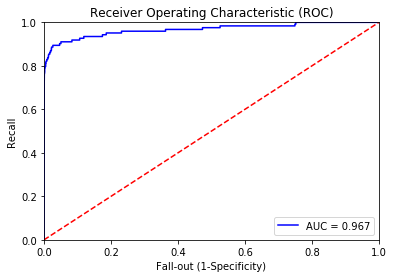

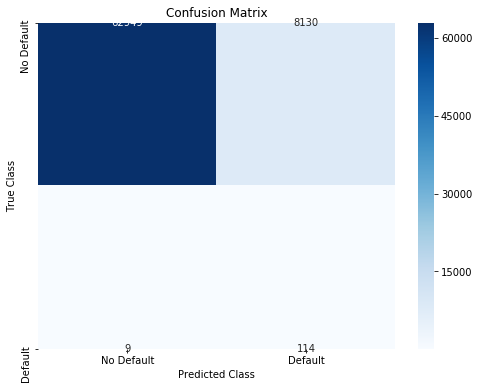

AUC(ROC): 0.9062247468378537
Precision: 0.013828238719068414
Recall: 0.926829268292683
F1 score: 0.027249910362136965
False positives: 8130
True positives: 114
False negatives: 9
True negatives: 62949
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426520, 30)
After OverSampling, the shape of train_y: (426520,) 

After OverSampling, counts of label '1': 213284
After OverSampling, counts of label '0': 213236
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

426520/426520 [==============================] - 25s 59us/step - loss: 12.1998 - rec_loss: 19.3613 - kl_loss: 4.1594 - val_loss: 12.8731 - val_rec_loss: 22.1784 - val_kl_loss: 3.1024
Epoch 17/150
426520/426520 [==============================] - 25s 58us/step - loss: 12.1625 - rec_loss: 19.3145 - kl_loss: 4.1534 - val_loss: 12.8755 - val_rec_loss: 22.2208 - val_kl_loss: 3.0645
Epoch 18/150
426520/426520 [==============================] - 25s 58us/step - loss: 12.1315 - rec_loss: 19.2519 - kl_loss: 4.1579 - val_loss: 12.8703 - val_rec_loss: 22.1317 - val_kl_loss: 3.1483
Epoch 19/150
426520/426520 [==============================] - 25s 59us/step - loss: 12.0957 - rec_loss: 19.1754 - kl_loss: 4.1583 - val_loss: 12.7417 - val_rec_loss: 21.8860 - val_kl_loss: 3.1362
Epoch 20/150
426520/426520 [==============================] - 25s 59us/step - loss: 12.0845 - rec_loss: 19.1442 - kl_loss: 4.1671 - val_loss: 12.8723 - val_rec_loss: 22.3148 - val_kl_loss: 2.9751
Epoch 21/150
426520/426520 [=====

Epoch 58/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.6237 - rec_loss: 18.1064 - kl_loss: 4.2587 - val_loss: 12.4714 - val_rec_loss: 21.2487 - val_kl_loss: 3.1835
Epoch 59/150
426520/426520 [==============================] - 25s 58us/step - loss: 11.6258 - rec_loss: 18.1089 - kl_loss: 4.2545 - val_loss: 12.5199 - val_rec_loss: 21.3649 - val_kl_loss: 3.1711
Epoch 60/150
426520/426520 [==============================] - 25s 58us/step - loss: 11.5986 - rec_loss: 18.0585 - kl_loss: 4.2558 - val_loss: 12.5890 - val_rec_loss: 21.4304 - val_kl_loss: 3.2364
Epoch 61/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.5840 - rec_loss: 18.0410 - kl_loss: 4.2491 - val_loss: 12.6433 - val_rec_loss: 21.6273 - val_kl_loss: 3.1560
Epoch 62/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.5848 - rec_loss: 18.0299 - kl_loss: 4.2582 - val_loss: 12.5577 - val_rec_loss: 21.4283 - val_kl_loss: 3.1906
Epoch 63/150
426520/

Epoch 100/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.4031 - rec_loss: 17.6846 - kl_loss: 4.3079 - val_loss: 12.4183 - val_rec_loss: 21.1193 - val_kl_loss: 3.2467
Epoch 101/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.3772 - rec_loss: 17.6308 - kl_loss: 4.3021 - val_loss: 12.3972 - val_rec_loss: 21.0442 - val_kl_loss: 3.2668
Epoch 102/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.3997 - rec_loss: 17.6647 - kl_loss: 4.3086 - val_loss: 12.3670 - val_rec_loss: 21.0379 - val_kl_loss: 3.2247
Epoch 103/150
426520/426520 [==============================] - 25s 58us/step - loss: 11.4011 - rec_loss: 17.6624 - kl_loss: 4.3205 - val_loss: 12.3030 - val_rec_loss: 20.8897 - val_kl_loss: 3.2400
Epoch 104/150
426520/426520 [==============================] - 25s 58us/step - loss: 11.4202 - rec_loss: 17.7211 - kl_loss: 4.2976 - val_loss: 12.4215 - val_rec_loss: 21.1674 - val_kl_loss: 3.2114
Epoch 105/150
4

426520/426520 [==============================] - 25s 59us/step - loss: 11.3152 - rec_loss: 17.4814 - kl_loss: 4.3177 - val_loss: 12.5662 - val_rec_loss: 21.3810 - val_kl_loss: 3.2565
Epoch 142/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.3044 - rec_loss: 17.4540 - kl_loss: 4.3282 - val_loss: 12.4289 - val_rec_loss: 21.1364 - val_kl_loss: 3.2402
Epoch 143/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.3505 - rec_loss: 17.5582 - kl_loss: 4.3231 - val_loss: 12.3275 - val_rec_loss: 20.9946 - val_kl_loss: 3.1835
Epoch 144/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.3299 - rec_loss: 17.5144 - kl_loss: 4.3236 - val_loss: 12.5400 - val_rec_loss: 21.2399 - val_kl_loss: 3.3506
Epoch 145/150
426520/426520 [==============================] - 25s 59us/step - loss: 11.3604 - rec_loss: 17.5693 - kl_loss: 4.3220 - val_loss: 12.3571 - val_rec_loss: 21.0101 - val_kl_loss: 3.2088
Epoch 146/150
426520/426520 [

Epoch 42/50
426520/426520 [==============================] - 88s 207us/step - loss: 0.3316 - accuracy: 0.8524 - val_loss: 0.2872 - val_accuracy: 0.8867
Epoch 43/50
426520/426520 [==============================] - 88s 207us/step - loss: 0.3320 - accuracy: 0.8525 - val_loss: 0.2785 - val_accuracy: 0.8887
Epoch 44/50
426520/426520 [==============================] - 89s 209us/step - loss: 0.3319 - accuracy: 0.8528 - val_loss: 0.2992 - val_accuracy: 0.8814
Epoch 45/50
426520/426520 [==============================] - 89s 209us/step - loss: 0.3322 - accuracy: 0.8529 - val_loss: 0.2834 - val_accuracy: 0.8877
Epoch 46/50
426520/426520 [==============================] - 88s 207us/step - loss: 0.3320 - accuracy: 0.8531 - val_loss: 0.2916 - val_accuracy: 0.8868
Epoch 47/50
426520/426520 [==============================] - 89s 208us/step - loss: 0.3321 - accuracy: 0.8530 - val_loss: 0.2844 - val_accuracy: 0.8911
Epoch 48/50
426520/426520 [==============================] - 89s 209us/step - loss: 0.33

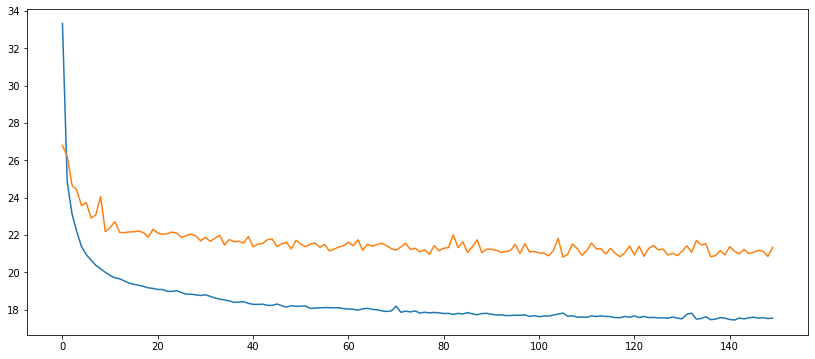

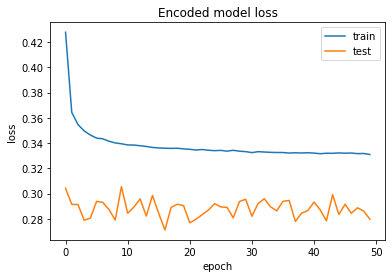

Overall accuracy of Convolutional Neural Network model: 0.8906631836184377


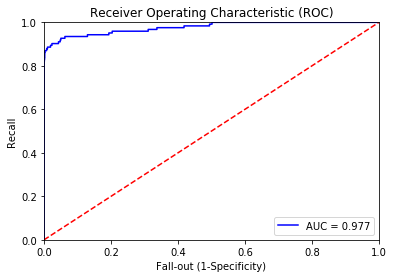

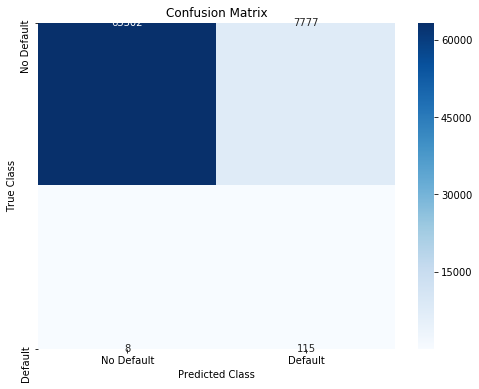

AUC(ROC): 0.912772940036833
Precision: 0.014571718195641155
Recall: 0.9349593495934959
F1 score: 0.028696194635059263
False positives: 7777
True positives: 115
False negatives: 8
True negatives: 63302
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426497, 30)
After OverSampling, the shape of train_y: (426497,) 

After OverSampling, counts of label '1': 213261
After OverSampling, counts of label '0': 213236
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

426497/426497 [==============================] - 25s 59us/step - loss: 12.9020 - rec_loss: 20.7104 - kl_loss: 3.9941 - val_loss: 13.5383 - val_rec_loss: 23.7419 - val_kl_loss: 2.7091
Epoch 17/150
426497/426497 [==============================] - 25s 58us/step - loss: 12.8419 - rec_loss: 20.5763 - kl_loss: 4.0015 - val_loss: 13.7330 - val_rec_loss: 24.0541 - val_kl_loss: 2.7947
Epoch 18/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.7437 - rec_loss: 20.3884 - kl_loss: 3.9997 - val_loss: 13.3422 - val_rec_loss: 23.4301 - val_kl_loss: 2.6533
Epoch 19/150
426497/426497 [==============================] - 25s 60us/step - loss: 12.7026 - rec_loss: 20.3192 - kl_loss: 4.0093 - val_loss: 13.4686 - val_rec_loss: 23.5532 - val_kl_loss: 2.7686
Epoch 20/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.6360 - rec_loss: 20.1670 - kl_loss: 4.0145 - val_loss: 13.3710 - val_rec_loss: 23.4104 - val_kl_loss: 2.7105
Epoch 21/150
426497/426497 [=====

Epoch 58/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.2645 - rec_loss: 19.3225 - kl_loss: 4.1678 - val_loss: 12.8436 - val_rec_loss: 22.0656 - val_kl_loss: 3.0033
Epoch 59/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.3081 - rec_loss: 19.3969 - kl_loss: 4.1656 - val_loss: 12.8291 - val_rec_loss: 22.1784 - val_kl_loss: 2.8599
Epoch 60/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.3847 - rec_loss: 19.5838 - kl_loss: 4.1399 - val_loss: 12.9789 - val_rec_loss: 22.4741 - val_kl_loss: 2.8460
Epoch 61/150
426497/426497 [==============================] - 25s 60us/step - loss: 12.3203 - rec_loss: 19.4471 - kl_loss: 4.1427 - val_loss: 12.9671 - val_rec_loss: 22.4718 - val_kl_loss: 2.8528
Epoch 62/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.2943 - rec_loss: 19.4244 - kl_loss: 4.1386 - val_loss: 12.8903 - val_rec_loss: 22.2384 - val_kl_loss: 2.9250
Epoch 63/150
426497/

Epoch 100/150
426497/426497 [==============================] - 25s 58us/step - loss: 12.1414 - rec_loss: 19.1070 - kl_loss: 4.2216 - val_loss: 12.5898 - val_rec_loss: 21.6542 - val_kl_loss: 2.9615
Epoch 101/150
426497/426497 [==============================] - 25s 58us/step - loss: 12.1853 - rec_loss: 19.2054 - kl_loss: 4.2013 - val_loss: 12.5270 - val_rec_loss: 21.6114 - val_kl_loss: 2.8892
Epoch 102/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.0772 - rec_loss: 19.0209 - kl_loss: 4.1984 - val_loss: 12.6298 - val_rec_loss: 21.6429 - val_kl_loss: 3.0609
Epoch 103/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.0845 - rec_loss: 19.0333 - kl_loss: 4.1958 - val_loss: 12.6578 - val_rec_loss: 21.8664 - val_kl_loss: 2.8904
Epoch 104/150
426497/426497 [==============================] - 25s 59us/step - loss: 12.0422 - rec_loss: 18.9307 - kl_loss: 4.2038 - val_loss: 12.5995 - val_rec_loss: 21.7728 - val_kl_loss: 2.8598
Epoch 105/150
4

426497/426497 [==============================] - 25s 59us/step - loss: 11.6183 - rec_loss: 18.0835 - kl_loss: 4.2355 - val_loss: 12.3323 - val_rec_loss: 21.2696 - val_kl_loss: 2.8462
Epoch 142/150
426497/426497 [==============================] - 25s 59us/step - loss: 11.6957 - rec_loss: 18.2096 - kl_loss: 4.2721 - val_loss: 12.5235 - val_rec_loss: 21.5435 - val_kl_loss: 2.9468
Epoch 143/150
426497/426497 [==============================] - 25s 59us/step - loss: 11.6849 - rec_loss: 18.1780 - kl_loss: 4.2827 - val_loss: 12.4609 - val_rec_loss: 21.3235 - val_kl_loss: 3.0395
Epoch 144/150
426497/426497 [==============================] - 25s 59us/step - loss: 11.6412 - rec_loss: 18.0816 - kl_loss: 4.2913 - val_loss: 12.2891 - val_rec_loss: 20.8928 - val_kl_loss: 3.1438
Epoch 145/150
426497/426497 [==============================] - 25s 58us/step - loss: 11.6317 - rec_loss: 18.0613 - kl_loss: 4.2933 - val_loss: 12.2979 - val_rec_loss: 20.9104 - val_kl_loss: 3.1281
Epoch 146/150
426497/426497 [

Epoch 42/50
426497/426497 [==============================] - 82s 193us/step - loss: 0.3153 - accuracy: 0.8742 - val_loss: 0.2774 - val_accuracy: 0.8602
Epoch 43/50
426497/426497 [==============================] - 82s 192us/step - loss: 0.3158 - accuracy: 0.8739 - val_loss: 0.2828 - val_accuracy: 0.8610
Epoch 44/50
426497/426497 [==============================] - 82s 192us/step - loss: 0.3154 - accuracy: 0.8740 - val_loss: 0.2742 - val_accuracy: 0.8620
Epoch 45/50
426497/426497 [==============================] - 82s 193us/step - loss: 0.3150 - accuracy: 0.8742 - val_loss: 0.2815 - val_accuracy: 0.8602
Epoch 46/50
426497/426497 [==============================] - 82s 193us/step - loss: 0.3153 - accuracy: 0.8741 - val_loss: 0.2875 - val_accuracy: 0.8598
Epoch 47/50
426497/426497 [==============================] - 82s 192us/step - loss: 0.3147 - accuracy: 0.8745 - val_loss: 0.2791 - val_accuracy: 0.8602
Epoch 48/50
426497/426497 [==============================] - 80s 187us/step - loss: 0.31

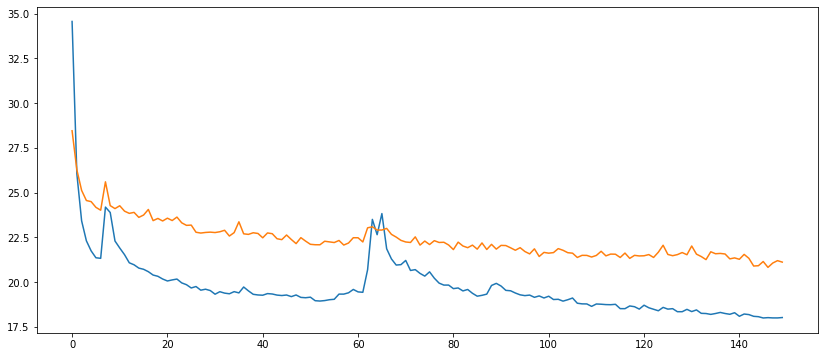

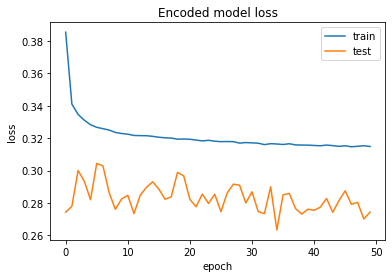

Overall accuracy of Convolutional Neural Network model: 0.8618297238841606


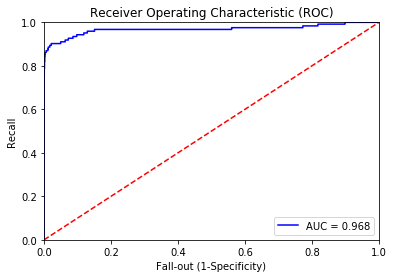

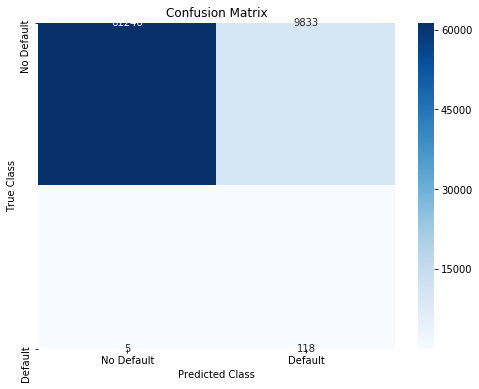

AUC(ROC): 0.9105052811385751
Precision: 0.011858104713094161
Recall: 0.959349593495935
F1 score: 0.023426642842962083
False positives: 9833
True positives: 118
False negatives: 5
True negatives: 61246
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426455, 30)
After OverSampling, the shape of train_y: (426455,) 

After OverSampling, counts of label '1': 213218
After OverSampling, counts of label '0': 213237
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

426455/426455 [==============================] - 24s 56us/step - loss: 11.9702 - rec_loss: 19.2158 - kl_loss: 3.9020 - val_loss: 13.3458 - val_rec_loss: 23.5278 - val_kl_loss: 2.6980
Epoch 17/150
426455/426455 [==============================] - 24s 55us/step - loss: 11.9554 - rec_loss: 19.1665 - kl_loss: 3.9311 - val_loss: 13.1166 - val_rec_loss: 23.0609 - val_kl_loss: 2.7086
Epoch 18/150
426455/426455 [==============================] - 24s 56us/step - loss: 11.8348 - rec_loss: 18.9225 - kl_loss: 3.9568 - val_loss: 13.2168 - val_rec_loss: 23.3079 - val_kl_loss: 2.6770
Epoch 19/150
426455/426455 [==============================] - 24s 55us/step - loss: 11.8301 - rec_loss: 18.9104 - kl_loss: 3.9566 - val_loss: 13.0569 - val_rec_loss: 22.8174 - val_kl_loss: 2.8495
Epoch 20/150
426455/426455 [==============================] - 24s 55us/step - loss: 11.7667 - rec_loss: 18.7859 - kl_loss: 3.9700 - val_loss: 13.0324 - val_rec_loss: 22.9383 - val_kl_loss: 2.6809
Epoch 21/150
426455/426455 [=====

Epoch 58/150
426455/426455 [==============================] - 24s 56us/step - loss: 11.3991 - rec_loss: 18.0323 - kl_loss: 4.0476 - val_loss: 12.9815 - val_rec_loss: 22.7439 - val_kl_loss: 2.7875
Epoch 59/150
426455/426455 [==============================] - 23s 55us/step - loss: 11.2790 - rec_loss: 17.7911 - kl_loss: 4.0516 - val_loss: 12.5560 - val_rec_loss: 21.8576 - val_kl_loss: 2.8246
Epoch 60/150
426455/426455 [==============================] - 24s 56us/step - loss: 11.3139 - rec_loss: 17.8600 - kl_loss: 4.0449 - val_loss: 12.6658 - val_rec_loss: 22.0384 - val_kl_loss: 2.8645
Epoch 61/150
426455/426455 [==============================] - 24s 57us/step - loss: 11.3302 - rec_loss: 17.8997 - kl_loss: 4.0446 - val_loss: 12.9081 - val_rec_loss: 22.4641 - val_kl_loss: 2.9075
Epoch 62/150
426455/426455 [==============================] - 24s 56us/step - loss: 11.3428 - rec_loss: 17.9155 - kl_loss: 4.0437 - val_loss: 12.5566 - val_rec_loss: 21.8062 - val_kl_loss: 2.8690
Epoch 63/150
426455/

Epoch 100/150
426455/426455 [==============================] - 24s 55us/step - loss: 11.6452 - rec_loss: 18.4150 - kl_loss: 4.1174 - val_loss: 12.7291 - val_rec_loss: 22.0128 - val_kl_loss: 2.9584
Epoch 101/150
426455/426455 [==============================] - 24s 56us/step - loss: 11.7402 - rec_loss: 18.5690 - kl_loss: 4.1446 - val_loss: 13.4008 - val_rec_loss: 23.4517 - val_kl_loss: 2.8633
Epoch 102/150
426455/426455 [==============================] - 24s 55us/step - loss: 11.7612 - rec_loss: 18.6380 - kl_loss: 4.1309 - val_loss: 12.4112 - val_rec_loss: 21.4035 - val_kl_loss: 2.9560
Epoch 103/150
426455/426455 [==============================] - 23s 55us/step - loss: 11.9723 - rec_loss: 19.0765 - kl_loss: 4.1173 - val_loss: 12.6910 - val_rec_loss: 22.0291 - val_kl_loss: 2.8717
Epoch 104/150
426455/426455 [==============================] - 23s 55us/step - loss: 12.4319 - rec_loss: 19.9899 - kl_loss: 4.1172 - val_loss: 12.7058 - val_rec_loss: 22.1145 - val_kl_loss: 2.8144
Epoch 105/150
4

426455/426455 [==============================] - 23s 53us/step - loss: 11.2033 - rec_loss: 17.5265 - kl_loss: 4.1314 - val_loss: 12.3717 - val_rec_loss: 21.4303 - val_kl_loss: 2.8170
Epoch 142/150
426455/426455 [==============================] - 23s 53us/step - loss: 11.2274 - rec_loss: 17.5598 - kl_loss: 4.1388 - val_loss: 12.3315 - val_rec_loss: 21.2504 - val_kl_loss: 2.9313
Epoch 143/150
426455/426455 [==============================] - 23s 53us/step - loss: 11.2970 - rec_loss: 17.7128 - kl_loss: 4.1253 - val_loss: 12.5864 - val_rec_loss: 21.7275 - val_kl_loss: 2.9570
Epoch 144/150
426455/426455 [==============================] - 23s 53us/step - loss: 11.3013 - rec_loss: 17.7083 - kl_loss: 4.1408 - val_loss: 12.7083 - val_rec_loss: 22.0123 - val_kl_loss: 2.9450
Epoch 145/150
426455/426455 [==============================] - 23s 54us/step - loss: 11.2726 - rec_loss: 17.6584 - kl_loss: 4.1360 - val_loss: 12.5115 - val_rec_loss: 21.5849 - val_kl_loss: 2.9531
Epoch 146/150
426455/426455 [

Epoch 42/50
426455/426455 [==============================] - 92s 216us/step - loss: 0.3276 - accuracy: 0.8608 - val_loss: 0.2933 - val_accuracy: 0.8643
Epoch 43/50
426455/426455 [==============================] - 91s 214us/step - loss: 0.3277 - accuracy: 0.8604 - val_loss: 0.2949 - val_accuracy: 0.8628
Epoch 44/50
426455/426455 [==============================] - 92s 215us/step - loss: 0.3273 - accuracy: 0.8613 - val_loss: 0.2923 - val_accuracy: 0.8653
Epoch 45/50
426455/426455 [==============================] - 91s 214us/step - loss: 0.3272 - accuracy: 0.8612 - val_loss: 0.2916 - val_accuracy: 0.8680
Epoch 46/50
426455/426455 [==============================] - 92s 215us/step - loss: 0.3275 - accuracy: 0.8609 - val_loss: 0.2902 - val_accuracy: 0.8673
Epoch 47/50
426455/426455 [==============================] - 91s 214us/step - loss: 0.3277 - accuracy: 0.8611 - val_loss: 0.2912 - val_accuracy: 0.8673
Epoch 48/50
426455/426455 [==============================] - 92s 215us/step - loss: 0.32

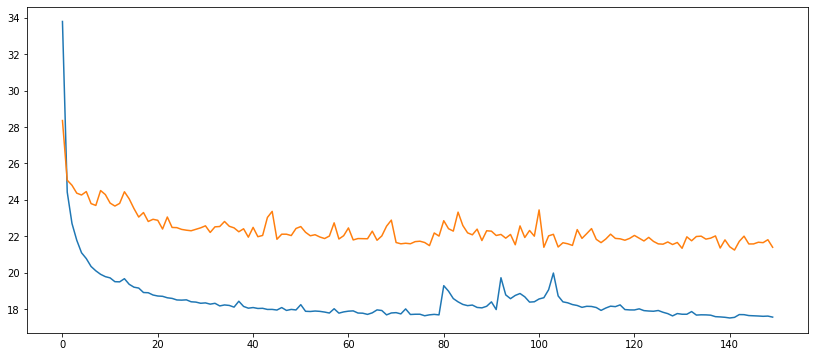

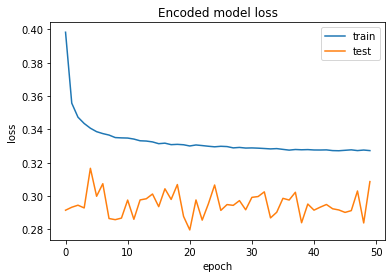

Overall accuracy of Convolutional Neural Network model: 0.8684569036951728


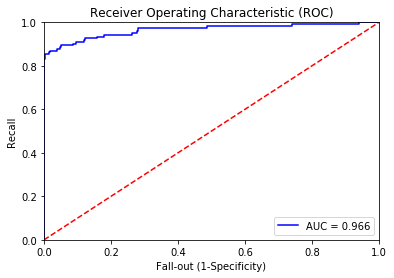

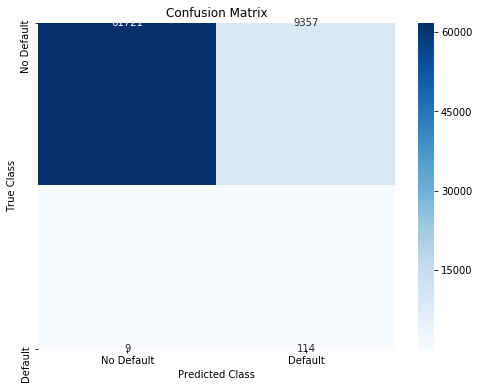

AUC(ROC): 0.8975925795021478
Precision: 0.012036743744060817
Recall: 0.926829268292683
F1 score: 0.023764853033145718
False positives: 9357
True positives: 114
False negatives: 9
True negatives: 61721


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = ADASYN(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 62304.5
Average fp = 8774.25
Average fn = 7.75
Average tp = 115.25
Average Precision = 1.30%
Average Recall = 93.70%
Average F1 score = 2.56%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 249218
Total fp: 35097
 Total fn:31
 Total tp:461
Total Precision = 0.012964733674559874
Total Recall = 0.9369918699186992
Total F1_score = 0.025575589459084606
